Határozzuk meg az alábbi ábrán látható tartó súlypontvonalának eltolódását leíró $v\left(x\right)$ függvényt végeselemes módszer használatával, síkbeli egyenes gerendalemek alkalmazásával.
Vizsgáljuk meg a végeselemes megoldással kapott hajlítónyomatéki igénybevétel hibáját az egyes szakaszokon.
Határozzuk meg az $x = a/2$ keresztmetszetben a hajlítónyomatéki igénybevétel nagyságát 2, illetve 3 síkbeli egyenes gerendaelem alkalmazásával.
A tartók két különböző átmérőjű ($d_1 = 2d$, illetve $d_2 = d$) kör keresztmetszetű tartókból
vannak összeépítve.
A tartók anyaga lineárisan rugalmas, homogén, izotrop. A $d_1$ átmérőjű rész rugalmassági modulusza $E$, míg a $d_2$ átmérővel rendelkező részé $4E$.

In [125]:
import sympy as sp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

sp.init_printing()

In [126]:
p, xi, L, I, E = sp.symbols("p, xi L I E")

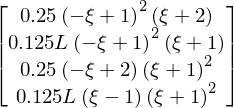

In [127]:
Nv = 1/8*sp.Matrix([2*(1-xi)**2*(2+xi),
                 L*(1-xi)**2*(1+xi),
                 2*(1+xi)**2*(2-xi),
                 L*(1+xi)**2*(xi-1)])
Nv

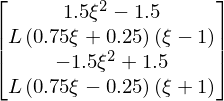

In [128]:
Nfi=sp.diff(Nv,xi)*(2/L)
sp.simplify((1/L)**(-1)*Nfi)

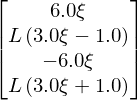

In [129]:
Bv=sp.diff(Nv,xi,2)*(2/L)**2
sp.simplify((1/L**2)**(-1)*Bv)

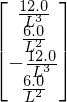

In [130]:
sp.diff(Bv,xi)*2/L

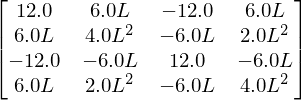

In [131]:
KeBEAM1D = I*E*sp.integrate(Bv*(Bv.T),(xi,-1,1))*L/2
(I*E/L**3)**(-1)*KeBEAM1D

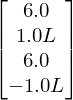

In [132]:
Fp = p*sp.integrate(Nv,(xi,-1,1))*L/2
(L*p/12)**(-1)*Fp

In [133]:
def Bvfgv(xi,L):
    return np.multiply(1/L**2,np.array([6*xi, L*(3*xi-1),-6*xi,L*(3*xi+1)]))

In [134]:
def Nvfgv(xi,L):
    return np.array([1/4*(1-xi)**2*(2+xi),
                 L/8*(1-xi)**2*(1+xi),
                 1/4*(1+xi)**2*(2-xi),
                 L/8*(1+xi)**2*(xi-1)])

In [135]:
def dddNvfgv(xi,L):
    return np.multiply(1/L**3,np.array([12, 6*L, -12, 6*L]))

In [136]:
def Nfifgv(xi,L):
    return np.multiply(1/L,np.array([1.5*xi**2-1.5,
                     L*(0.75*xi+0.25)*(xi-1),
                     -1.5*xi**2+1.5,
                     L*(0.75*xi-0.25)*(xi+1)]))

In [137]:
def KeBEAM1D(I,E,L):
    return np.multiply(I*E/L**3, np.array([[12,   6*L,    -12,  6*L],
                                           [6*L,  4*L**2, -6*L, 2*L**2],
                                           [-12,  -6*L,    12,  -6*L],
                                           [6*L, 2*L**2, -6*L, 4*L**2]]))

In [138]:
def Fp(p,L):
    return np.multiply(L*p/12,np.array([6,L,6,-L]))

In [139]:
Ne1 = 10
Ne2 = 3
a=800e-3
b=400e-3
d=20e-3
E=50e9
nu=0.3
F1=2500
M1=-500
p0=-5000

In [140]:
I1 = (2*d)**4*np.pi/64
I2 = (d)**4*np.pi/64
E1 = E
E2 = 4*E
Ke1 = KeBEAM1D(I1,E1,a/Ne1)
Ke2 = KeBEAM1D(I2,E2,b/Ne2)

In [141]:
elemSZF1 = [np.arange(2*i,2*(i+2)) for i in np.arange(Ne1)]
elemSZF1

[array([0, 1, 2, 3]),
 array([2, 3, 4, 5]),
 array([4, 5, 6, 7]),
 array([6, 7, 8, 9]),
 array([ 8,  9, 10, 11]),
 array([10, 11, 12, 13]),
 array([12, 13, 14, 15]),
 array([14, 15, 16, 17]),
 array([16, 17, 18, 19]),
 array([18, 19, 20, 21])]

In [142]:
elemSZF2 = [np.arange(2*i,2*(i+2)) for i in np.arange(Ne1,Ne1+Ne2)]
elemSZF2

[array([20, 21, 22, 23]), array([22, 23, 24, 25]), array([24, 25, 26, 27])]

In [143]:
KG=np.zeros((2*(Ne1+Ne2+1),2*(Ne1+Ne2+1)))

for eind in range(Ne1):
    KG[np.ix_(elemSZF1[eind],elemSZF1[eind])]+=Ke1

for eind in range(Ne2):
    KG[np.ix_(elemSZF2[eind],elemSZF2[eind])]+=Ke2

In [144]:
FG=np.zeros(2*(Ne1+Ne2+1))
for eind in range(Ne1):
    FG[elemSZF1[eind]] += Fp(p0,a/Ne1)
FG[elemSZF1[-1][2]] += F1
FG[elemSZF2[-1][3]] += M1

In [145]:
fixSZF=np.array([0,1,elemSZF2[-1][2]])

In [146]:
szabadSZF=[i for i in range(0,2*(Ne1+Ne2+1)) if i not in fixSZF]
szabadSZF

In [147]:
KGkond = KG[np.ix_(szabadSZF,szabadSZF)]

In [148]:
FGkond = FG[np.ix_(szabadSZF)]

In [149]:
Umego = np.linalg.solve(KGkond,FGkond)
Umego

array([ 0.00011748,  0.00311519,  0.00052152,  0.00709619,  0.00126509,
        0.01153555,  0.00236857,  0.01602584,  0.00381972,  0.02015963,
        0.00557373,  0.02352947,  0.0075532 ,  0.02572793,  0.0096481 ,
        0.02634757,  0.01171584,  0.02498096,  0.01358122,  0.02122066,
        0.01408423, -0.01414711,  0.00968291, -0.05234429, -0.0933709 ])

In [150]:
UG = np.zeros(2*(Ne1+Ne2+1))
UG[np.ix_(szabadSZF)] += Umego
UG

array([ 0.        ,  0.        ,  0.00011748,  0.00311519,  0.00052152,
        0.00709619,  0.00126509,  0.01153555,  0.00236857,  0.01602584,
        0.00381972,  0.02015963,  0.00557373,  0.02352947,  0.0075532 ,
        0.02572793,  0.0096481 ,  0.02634757,  0.01171584,  0.02498096,
        0.01358122,  0.02122066,  0.01408423, -0.01414711,  0.00968291,
       -0.05234429,  0.        , -0.0933709 ])

In [151]:
FR = np.dot(KG,UG)-FG
FR

array([  1.25000000e+03,  -2.00000000e+02,   0.00000000e+00,
        -1.13686838e-12,   0.00000000e+00,   5.63886715e-11,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -3.63797881e-12,   0.00000000e+00,  -2.36468622e-11,
         2.32830644e-10,  -7.27595761e-12,   0.00000000e+00,
         2.54658516e-11,   0.00000000e+00,   1.09139364e-11,
         4.65661287e-10,  -4.72937245e-11,   2.32830644e-10,
        -9.70157288e-12,  -2.91038305e-11,   2.04636308e-12,
         0.00000000e+00,  -3.63797881e-12,   2.50000000e+02,
        -1.81898940e-12])

# Eredmények ábrázolása

In [152]:
xiLista = np.linspace(-1,1,num = 10)
cspxKRD1=[[0 + i*a/Ne1,0 + (i+1)*a/Ne1] for i in range(Ne1)]
cspxKRD2=[[a + i*b/Ne2,a + (i+1)*b/Ne2] for i in range(Ne2)]

In [153]:
x1Lista=[(cspxKRD1[eind][1]-cspxKRD1[eind][0])/2*(xi+1) + cspxKRD1[eind][0] for eind in range(Ne1) for xi in xiLista]
x2Lista=[(cspxKRD2[eind][1]-cspxKRD2[eind][0])/2*(xi+1) + cspxKRD2[eind][0] for eind in range(Ne2) for xi in xiLista]
xLista = np.concatenate((x1Lista,x2Lista))

In [154]:
v1Lista = [np.dot(Nvfgv(xi,a/Ne1), UG[elemSZF1[eind]]) for eind in range(Ne1) for xi in xiLista]
v2Lista = [np.dot(Nvfgv(xi,b/Ne2), UG[elemSZF2[eind]]) for eind in range(Ne2) for xi in xiLista]
vLista = np.concatenate((v1Lista,v2Lista))

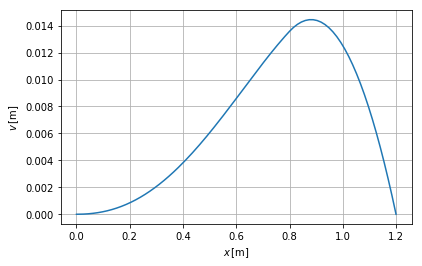

In [155]:
figv = plt.figure(num = 1, figsize=(16/2.54,10/2.54))
axv = figv.add_subplot(111)

axv.plot(xLista,vLista)

plt.xlabel(r"$x \, \left[\mathrm{m}\right]$")
plt.ylabel(r"$v \, \left[\mathrm{m}\right]$")

plt.grid()
plt.legend()
plt.show()

In [156]:
fi1Lista = [np.dot(Nfifgv(xi,a/Ne1),UG[elemSZF1[eind]]) for eind in range(Ne1) for xi in xiLista]
fi2Lista = [np.dot(Nfifgv(xi,b/Ne2),UG[elemSZF2[eind]]) for eind in range(Ne2) for xi in xiLista]
fiLista = np.concatenate((fi1Lista,fi2Lista))

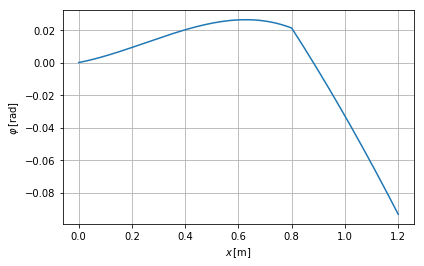

In [157]:
figfi = plt.figure(num = 2, figsize=(16/2.54,10/2.54))
axfi = figfi.add_subplot(111)

axfi.plot(xLista,fiLista)

plt.xlabel(r"$x \, \left[\mathrm{m}\right]$")
plt.ylabel(r"$\varphi \, \left[\mathrm{rad}\right]$")

plt.grid()
plt.legend()
plt.show()

In [158]:
Mh1Lista = [-I1*E1*np.dot(Bvfgv(xi,a/Ne1),UG[elemSZF1[eind]]) for eind in range(Ne1) for xi in xiLista]
Mh2Lista = [-I2*E2*np.dot(Bvfgv(xi,b/Ne2),UG[elemSZF2[eind]]) for eind in range(Ne2) for xi in xiLista]
MhLista = np.concatenate((Mh1Lista,Mh2Lista))

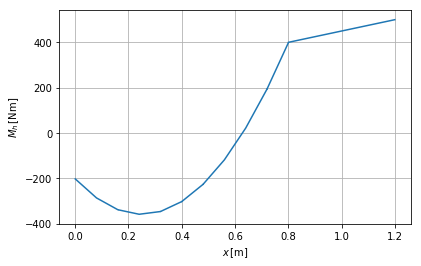

In [159]:
figMh = plt.figure(num = 3, figsize=(16/2.54,10/2.54))
axMh = figMh.add_subplot(111)

axMh.plot(xLista,MhLista)

plt.xlabel(r"$x \, \left[\mathrm{m}\right]$")
plt.ylabel(r"$M_h \, \left[\mathrm{Nm}\right]$")

plt.grid()
plt.legend()
plt.show()

In [160]:
V1Lista = [I1*E1*np.dot(dddNvfgv(xi,a/Ne1),UG[elemSZF1[eind]]) for eind in range(Ne1) for xi in xiLista]
V2Lista = [I2*E2*np.dot(dddNvfgv(xi,b/Ne2),UG[elemSZF2[eind]]) for eind in range(Ne2) for xi in xiLista]
VLista = np.concatenate((V1Lista,V2Lista))

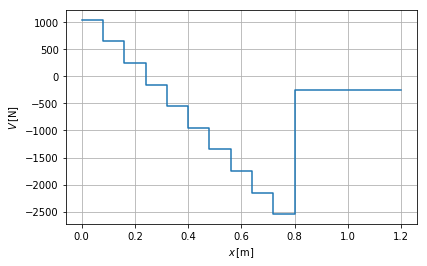

In [161]:
figV = plt.figure(num = 4, figsize=(16/2.54,10/2.54))
axV = figV.add_subplot(111)

axV.plot(xLista,VLista)

plt.xlabel(r"$x \, \left[\mathrm{m}\right]$")
plt.ylabel(r"$V \, \left[\mathrm{N}\right]$")

plt.grid()
plt.legend()
plt.show()